# 1. Training Loss Comparison

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import seaborn as sns
%matplotlib inline

wd = "/home/xin/OneDrive/Working_directory/DDRE_Sampling_GANs/Simulation"
os.chdir(wd)

loss_SP_filename = wd+"/Output/Training_loss_fig/extra 3/TrainCurve_DRE_SP_LAMBDA_0.05_FinalActFn_ReLU_epoch_5000_PreNetDRE_False_SEED_2019_nSim_0_epochGAN_50_TrainLoss.npy"
loss_uLSIF_filename = wd+"/Output/Training_loss_fig/extra 3/TrainCurve_DRE_uLSIF_LAMBDA_0.05_FinalActFn_ReLU_epoch_5000_PreNetDRE_False_SEED_2019_nSim_0_epochGAN_50_TrainLoss.npy"

loss_SP = np.load(loss_SP_filename)
loss_uLSIF = np.load(loss_uLSIF_filename)

epochs = np.arange(len(loss_SP))

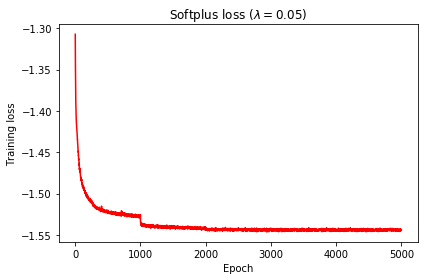

In [2]:
filename = wd+"/Output/saved_images/training_loss_SP.pdf"

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training loss')
l1=ax1.plot(epochs, loss_SP, c='r', ls='-')
ax1.set_title("Softplus loss ($\lambda=0.05$)")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig.savefig(filename, bbox_inches='tight')

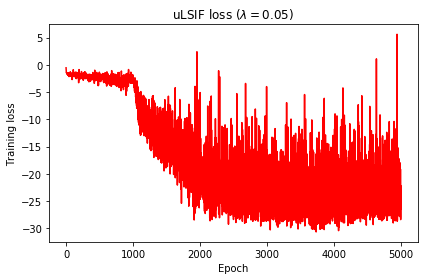

In [3]:
filename = wd+"/Output/saved_images/training_loss_uLSIF.pdf"

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training loss')
l1=ax1.plot(epochs, loss_uLSIF, c='r', ls='-')
ax1.set_title("uLSIF loss ($\lambda=0.05$)")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig.savefig(filename, bbox_inches='tight')

# 2. Avg. density ratio versus epoch of DRE training, lambda=0.05

In [25]:
data_file_SP = wd + "/Extra3_DR_analysis_versus_epochsKT_NoNorm_SP_lambda0.05.csv"
data_SP = np.loadtxt(data_file_SP, delimiter=",")
epochs = data_SP[:,0]
dr_fake_SP = data_SP[:,1]
dr_fake_hq_SP = data_SP[:,2]
dr_fake_lq_SP = data_SP[:,3]
percentHQ_SP = data_SP[:,4]

data_file_uLSIF = wd + "/Extra3_DR_analysis_versus_epochsKT_NoNorm_uLSIF_lambda0.05.csv"
data_uLSIF = np.loadtxt(data_file_uLSIF, delimiter=",")
dr_fake_uLSIF = data_uLSIF[:,1]
dr_fake_hq_uLSIF = data_uLSIF[:,2]
dr_fake_lq_uLSIF = data_uLSIF[:,3]
percentHQ_uLSIF = data_uLSIF[:,4]

ground_truth = np.array([0.919571721583069, 2.21436892876229, 0.000999970376239535])

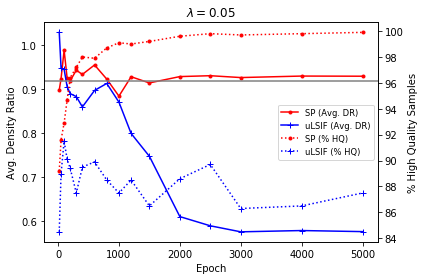

In [31]:
## lambda=0.05: Density ratio for fake samples

filename = wd + "/Output/saved_images/dr_versus_epochs_fake_samples_lambda0.05.pdf"

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Avg. Density Ratio')
l1=ax1.plot(epochs, dr_fake_SP, c='r', ls='-', marker='.', label = "SP (Avg. DR)")
l2=ax1.plot(epochs, dr_fake_uLSIF, c='b', ls='-', marker='+', label = "uLSIF (Avg. DR)")
ax1.axhline(y=ground_truth[0], color='grey')

ax2 = ax1.twinx()
ax2.set_ylabel('% High Quality Samples')
l3=ax2.plot(epochs, percentHQ_SP, c='r', ls=':', marker='.', label = "SP (% HQ)")
l4=ax2.plot(epochs, percentHQ_uLSIF, c='b', ls=':', marker='+', label = "uLSIF (% HQ)")

lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=5, fontsize='small')
ax1.set_title("$\lambda=0.05$")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig.savefig(filename, bbox_inches='tight')

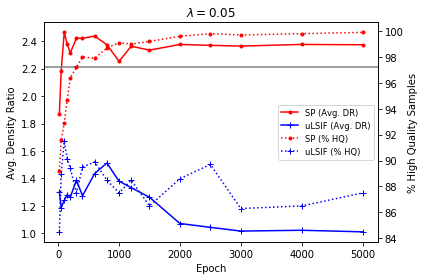

In [32]:
## lambda=0.05: Density ratio for HQ fake samples

filename = wd + "/Output/saved_images/dr_versus_epochs_HQ_fake_samples_lambda0.05.pdf"

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Avg. Density Ratio')
l1=ax1.plot(epochs, dr_fake_hq_SP, c='r', ls='-', marker='.', label = "SP (Avg. DR)")
l2=ax1.plot(epochs, dr_fake_hq_uLSIF, c='b', ls='-', marker='+', label = "uLSIF (Avg. DR)")
ax1.axhline(y=ground_truth[1], color='grey')

ax2 = ax1.twinx()
ax2.set_ylabel('% High Quality Samples')
l3=ax2.plot(epochs, percentHQ_SP, c='r', ls=':', marker='.', label = "SP (% HQ)")
l4=ax2.plot(epochs, percentHQ_uLSIF, c='b', ls=':', marker='+', label = "uLSIF (% HQ)")

lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=5, fontsize='small')
ax1.set_title("$\lambda=0.05$")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig.savefig(filename, bbox_inches='tight')

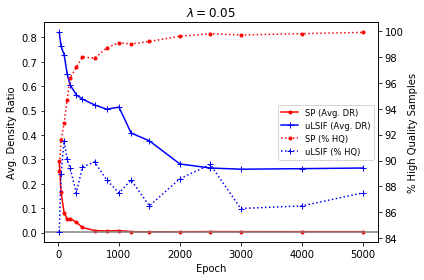

In [33]:
## lambda=0.05: Density ratio for LQ fake samples

filename = wd + "/Output/saved_images/dr_versus_epochs_LQ_fake_samples_lambda0.05.pdf"

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Avg. Density Ratio')
l1=ax1.plot(epochs, dr_fake_lq_SP, c='r', ls='-', marker='.', label = "SP (Avg. DR)")
l2=ax1.plot(epochs, dr_fake_lq_uLSIF, c='b', ls='-', marker='+', label = "uLSIF (Avg. DR)")
ax1.axhline(y=ground_truth[2], color='grey')

ax2 = ax1.twinx()
ax2.set_ylabel('% High Quality Samples')
l3=ax2.plot(epochs, percentHQ_SP, c='r', ls=':', marker='.', label = "SP (% HQ)")
l4=ax2.plot(epochs, percentHQ_uLSIF, c='b', ls=':', marker='+', label = "uLSIF (% HQ)")

lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=5, fontsize='small')
ax1.set_title("$\lambda=0.05$")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig.savefig(filename, bbox_inches='tight')

# 3. Avg. density ratio versus epoch of DRE training, lambda=0

In [34]:
data_file_SP = wd + "/Extra3_DR_analysis_versus_epochsKT_NoNorm_SP_lambda0.csv"
data_SP = np.loadtxt(data_file_SP, delimiter=",")
epochs = data_SP[:,0]
dr_fake_SP = data_SP[:,1]
dr_fake_hq_SP = data_SP[:,2]
dr_fake_lq_SP = data_SP[:,3]
percentHQ_SP = data_SP[:,4]

data_file_uLSIF = wd + "/Extra3_DR_analysis_versus_epochsKT_NoNorm_uLSIF_lambda0.csv"
data_uLSIF = np.loadtxt(data_file_uLSIF, delimiter=",")
dr_fake_uLSIF = data_uLSIF[:,1]
dr_fake_hq_uLSIF = data_uLSIF[:,2]
dr_fake_lq_uLSIF = data_uLSIF[:,3]
percentHQ_uLSIF = data_uLSIF[:,4]

ground_truth = np.array([0.919571721583069, 2.21436892876229, 0.000999970376239535])

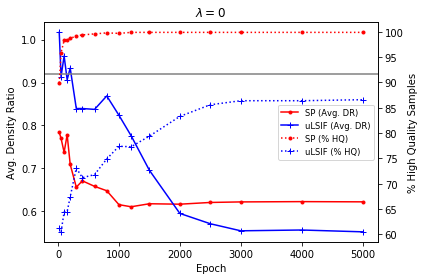

In [38]:
## lambda=0: Density ratio for fake samples

filename = wd + "/Output/saved_images/dr_versus_epochs_fake_samples_lambda0.pdf"

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Avg. Density Ratio')
l1=ax1.plot(epochs, dr_fake_SP, c='r', ls='-', marker='.', label = "SP (Avg. DR)")
l2=ax1.plot(epochs, dr_fake_uLSIF, c='b', ls='-', marker='+', label = "uLSIF (Avg. DR)")
ax1.axhline(y=ground_truth[0], color='grey')

ax2 = ax1.twinx()
ax2.set_ylabel('% High Quality Samples')
l3=ax2.plot(epochs, percentHQ_SP, c='r', ls=':', marker='.', label = "SP (% HQ)")
l4=ax2.plot(epochs, percentHQ_uLSIF, c='b', ls=':', marker='+', label = "uLSIF (% HQ)")

lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=5, fontsize='small')
ax1.set_title("$\lambda=0$")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig.savefig(filename, bbox_inches='tight')

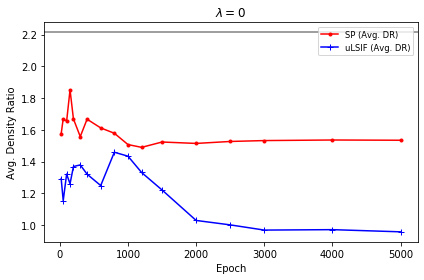

In [41]:
## lambda=0: Density ratio for HQ fake samples

filename = wd + "/Output/saved_images/dr_versus_epochs_HQ_fake_samples_lambda0.pdf"

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Avg. Density Ratio')
l1=ax1.plot(epochs, dr_fake_hq_SP, c='r', ls='-', marker='.', label = "SP (Avg. DR)")
l2=ax1.plot(epochs, dr_fake_hq_uLSIF, c='b', ls='-', marker='+', label = "uLSIF (Avg. DR)")
ax1.axhline(y=ground_truth[1], color='grey')

lns = l1+l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1, fontsize='small')
ax1.set_title("$\lambda=0$")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig.savefig(filename, bbox_inches='tight')

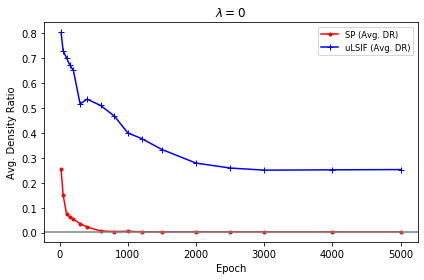

In [43]:
## lambda=0: Density ratio for LQ fake samples

filename = wd + "/Output/saved_images/dr_versus_epochs_LQ_fake_samples_lambda0.pdf"

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Avg. Density Ratio')
l1=ax1.plot(epochs, dr_fake_lq_SP, c='r', ls='-', marker='.', label = "SP (Avg. DR)")
l2=ax1.plot(epochs, dr_fake_lq_uLSIF, c='b', ls='-', marker='+', label = "uLSIF (Avg. DR)")
ax1.axhline(y=ground_truth[2], color='grey')

lns = l1+l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1, fontsize='small')
ax1.set_title("$\lambda=0$")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig.savefig(filename, bbox_inches='tight')